In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import GridSearchCV

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [ ]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
df = pd.read_csv(filename, names = headers)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

#handl NaN

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)

str_avg = df["stroke"].astype("float").mean()
df["stroke"].replace(np.nan, str_avg, inplace = True)

# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

avg_horsepower = df["engine-size"].astype('float').mean(axis=0)
df["engine-size"].replace(np.nan, avg_horsepower, inplace=True)

avg_peak = df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.nan, avg_peak, inplace=True)

avg_peak = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, avg_peak, inplace=True)

avg = df["curb-weight"].astype("float").mean(axis=0)
df["curb-weight"].replace(np.nan, avg, inplace=True)

avg_peak = df["highway-mpg"].astype("float").mean(axis=0)
df["highway-mpg"].replace(np.nan, avg_peak, inplace=True)

df[["price"]] = df[["price"]].astype("int")
df[["horsepower"]] = df[["horsepower"]].astype("int")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("int")

Average of normalized-losses: 122.0
Average of bore: 3.3297512437810943


In [ ]:
#create linear regression object
lm=LinearRegression()

#define predictor variable and target variable
x_data = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
y_data = df['price']

#split data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

#cross validation
scores = cross_val_score(lm,x_data,y_data,cv=10)
np.mean(scores)

#
yhat = cross_val_predict(lm,x_data,y_data,cv=10)




**R square**

In [ ]:
rsqu = []
order = [1,2,3,4]
for n in order:
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])
  lm.fit(x_train_pr,y_train)
  rsqu.append(lm.score(x_test_pr,y_test))

**Ridge Regression**

In [ ]:
X = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
y = df['price']
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(X,y)
yhat = ridge_model.predict(X)

**Training and Testing**

In [ ]:
y_data = df['price']
x_data=df.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)
#R^2
print(lre.score(x_test[['horsepower']], y_test))
#R^2
print(lre.score(x_train[['horsepower']], y_train))

number of test samples : 21
number of training samples: 180
0.36339478087886834
0.6622424809407366


**Cross Validation**

In [ ]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=10)
#The default scoring is R^2. Each element in the array has the average R^2 value for the fold
Rcross
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
#We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

# function 'cross_val_predict' to predict the output.
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=10)
yhat[0:5]

The mean of the folds are -0.13380394167602838 and the standard deviation is 0.9053226584450355


array([14063.12957191, 14063.12957191, 21007.66451452, 12609.62225834,
       14709.13282239])

**Overfitting with Multiple Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11350.96269501,  5884.81415149, 11206.85674887,  6640.86207975,
       15566.72516819])

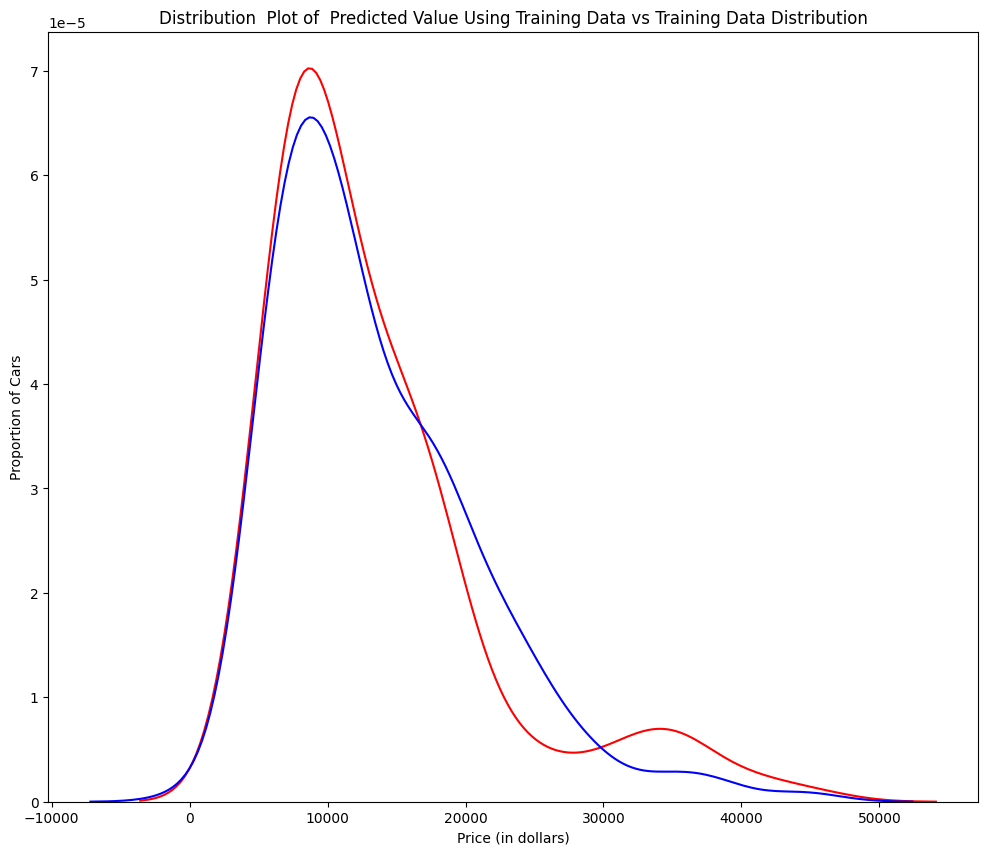

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

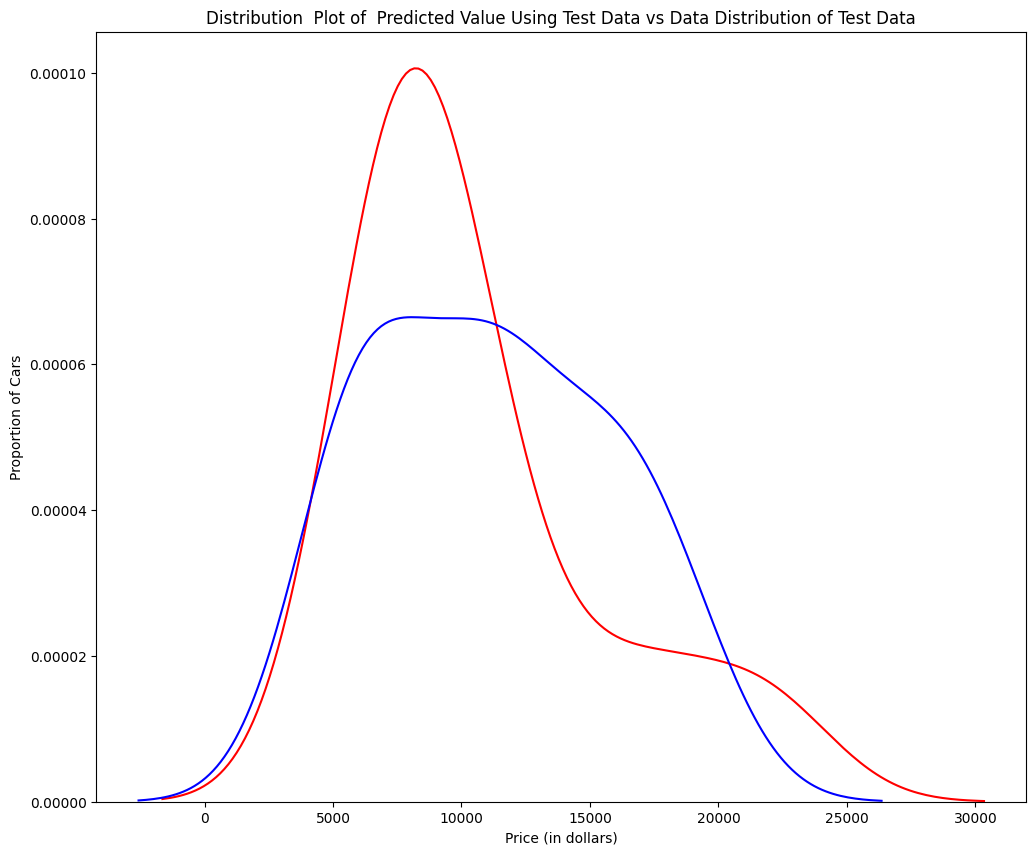

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

**polynomial regression**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

**Linear regression**

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)
yhat[0:5]
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6722.92300002  7301.45333978 12214.15881644 18901.60512403]
True values: [ 6295 10698 13860 13499]


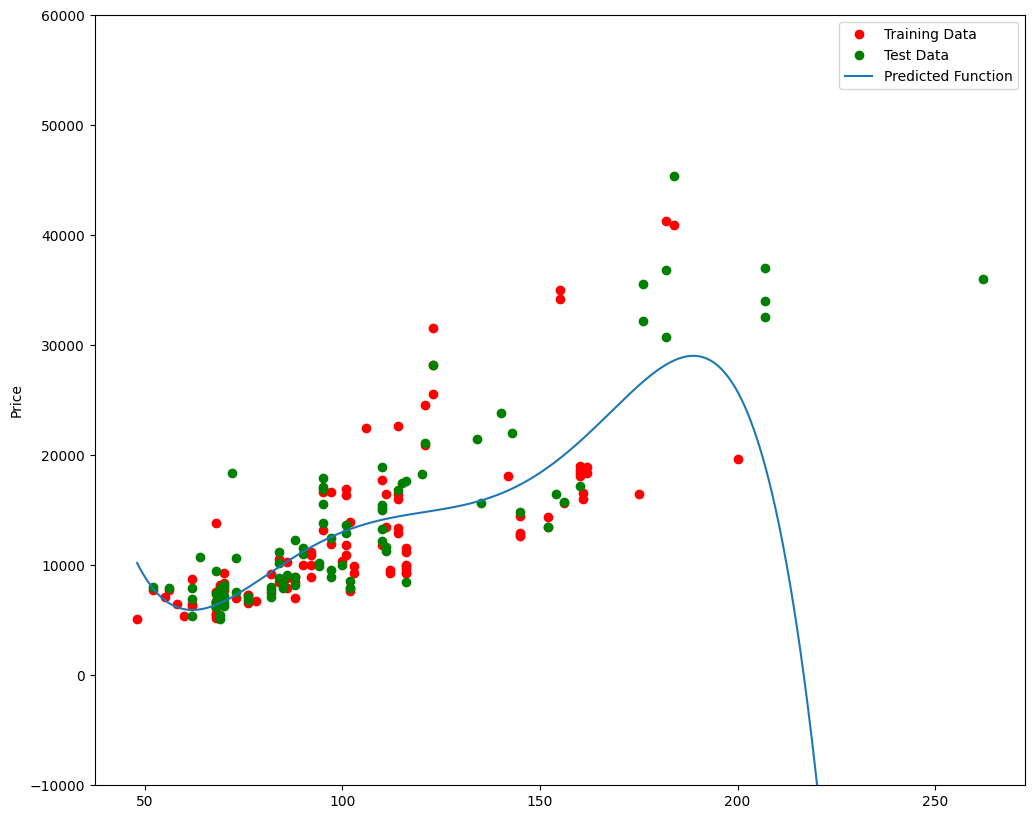

In [ ]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [ ]:
poly.score(x_train_pr, y_train)

0.5571757385331852

In [ ]:
poly.score(x_test_pr, y_test)

-29.624484137942915

Text(3, 0.75, 'Maximum R^2 ')

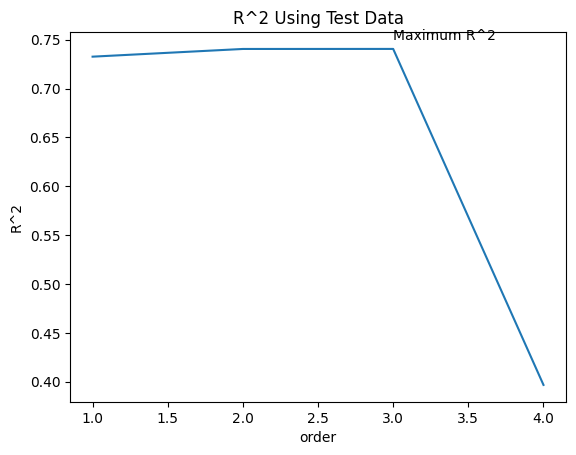

In [ ]:
# R^2 changes on the test data for different order polynomials and then plot the results
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

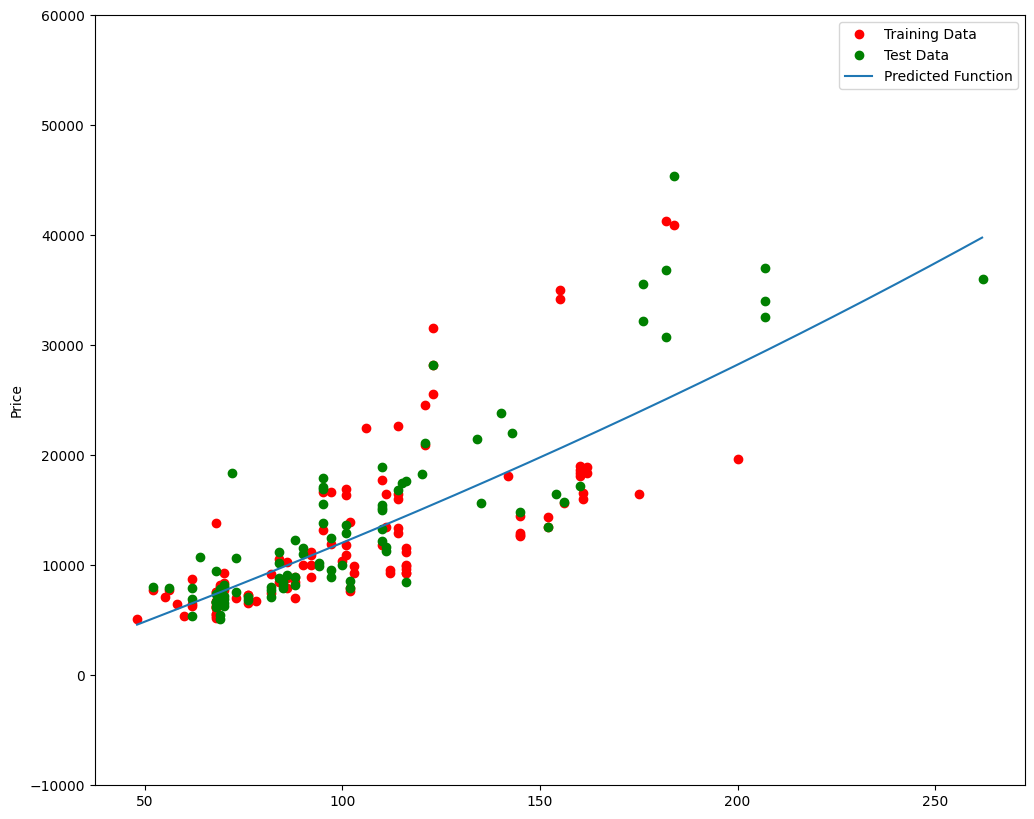

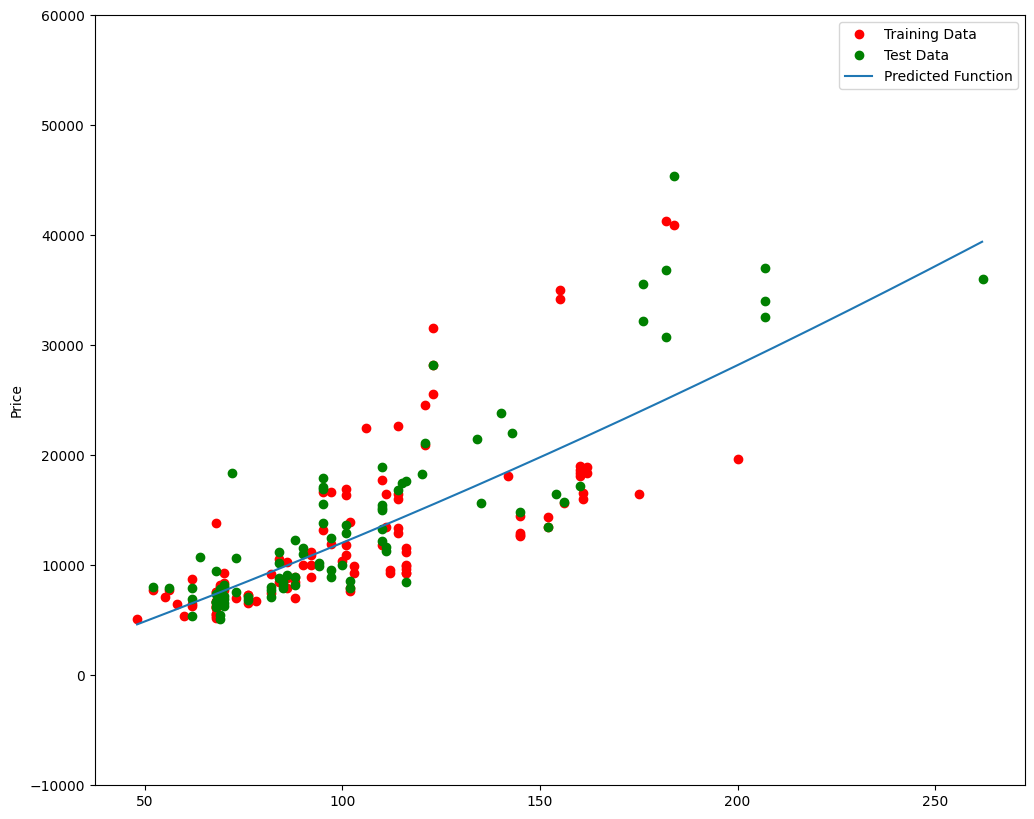

In [ ]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

**Ridge Regression**

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [ ]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6577.53720013  9627.07836056 20940.46130682 19402.66018406]
test set : [ 6295 10698 13860 13499]


In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:05<00:00, 174.58it/s, Test Score=0.564, Train Score=0.859]


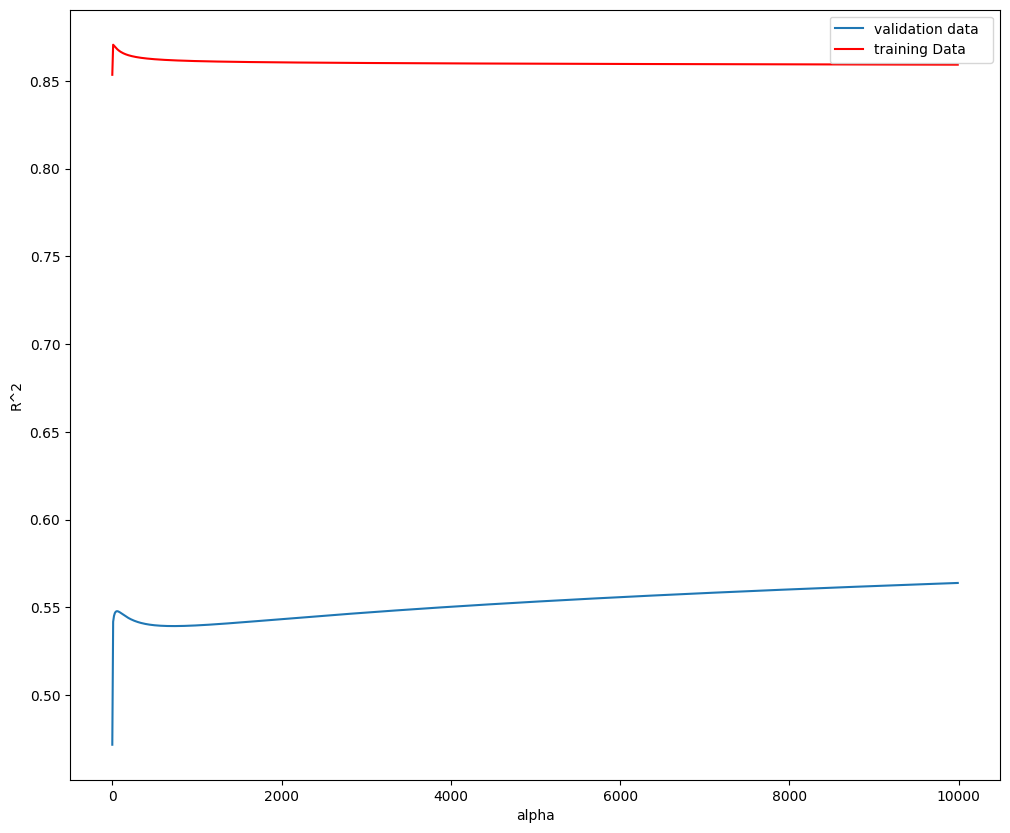

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Grid Search**

In [ ]:
#create a dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
#Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=10)
#fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
BestRR=Grid1.best_estimator_
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8412287494745088

In [ ]:
best_alpha = Grid1.best_params_['alpha']
best_alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)